# Learning of the Control Barrier Function

In [ ]:
""" Copyright (c) 2023, ETH Zurich, 
Alexandre Didier*, Robin C. Jacobs*, Jerome Sieber*, Kim P. Wabersich°, Prof. Dr. Melanie N. Zeilinger*, 
*Institute for Dynamic Systems and Control, D-MAVT
°Corporate Research of Robert Bosch GmbH
All rights reserved."""

In [2]:
import numpy as np
import torch
import pickle
import matplotlib.pyplot as plt
from apcbf.custom_dataset import *

In [3]:
save_figure = False
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 30})
plt.rc('text', usetex=True)

In [4]:
torch.cuda.is_available()

True

In [5]:
import apcbf.simulation as sim
from apcbf.dynamic import LinearDiscreteDynamics
from apcbf.cbfcontroller import *
from pytope import Polytope
import polytope as pt
import cvxpy as cp
from tqdm.notebook import tqdm

`polytope` failed to import `cvxopt.glpk`.
will use `scipy.optimize.linprog`


### Specify System

In [6]:
#A = np.mat([[-1, 0.5],[-1, 0.5]]) #stable
A = np.mat([[1.05, 1],[0, 1]]) #unstable, from paper
#B = np.mat([[1,],[0,]])
B = np.mat([[1,],[0.5,]]) # from paper

In [7]:
lin_sys = LinearDiscreteDynamics(A, B)
sys = lin_sys
print(sys)

LinearDiscreteDynamics(
 A: [[1.05 1.  ]
 [0.   1.  ]], 
 B: [[1. ]
 [0.5]])


Constraints

In [8]:
Hx = np.kron(np.eye(A.shape[0]),np.array([[1],[-1]]))
hx = np.ones((2*A.shape[0],1))
XConstraints = Polytope(Hx, hx)
Hu = np.array([[1],[-1]])
hu = np.ones((B.shape[0],1))
UConstraints = Polytope(Hu, hu)

In [9]:
N = 20
c = 0.001
mu_x = np.sqrt(0.001)
mu_u = np.sqrt(0.001)
alpha_f = 1000 
delta_i = lambda i : i*0.005 #as done in example

In [10]:
OPTIMIZER = cp.MOSEK

### Load parameters

In [12]:
# load parameters obtained in  PCBF Notebook
params_dict = pickle.load(open( "../params/linear_termset_params.p", "rb" ))
P = params_dict['Pf']
K = params_dict['Kf']
gamma_x =  params_dict['gamma_x']
gamma_f = params_dict['gamma_f']
alpha_f = params_dict['alpha_f']

In [11]:
gamma_x

0.0035599482888812053

### Plot $h_{\mathrm{PB}}$

In [12]:
pcbf = SlackOpt(lin_sys, XConstraints, UConstraints, delta_i, alpha_f, P, gamma_x, N=20, verbose=False)

In [13]:
#%matplotlib widget
n_points = 50
x1 = np.linspace(-2.5,2.5,n_points)
x2 = np.linspace(-2.5,2.5,n_points)
x1,x2 = np.meshgrid(x1,x2)
hpb = np.zeros((len(x1), len(x2)))

numb_exceptions = 0
#x_safe, u_safe = sim.simulate_discrete(x0, lin_sys, controller_object=algo, Nsteps=N_steps)

for j in tqdm(range(len(x1))):
    for k in tqdm(range(len(x2)), leave = False):
        try :
            _ , _, hpb[j,k] = pcbf.solve(np.array([x1[j,k], x2[j,k]]))
        except Exception as e:
            #print(e)
            numb_exceptions += 1
            plt.scatter(x1[j,k], x2[j,k])
            hpb[j,k] = np.max(hpb)
            #print(x1[j,k], x2[j,k])
            
print(f"Total number of numerical failures to compute hbp : {numb_exceptions}")

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Total number of numerical failures to compute hbp : 0


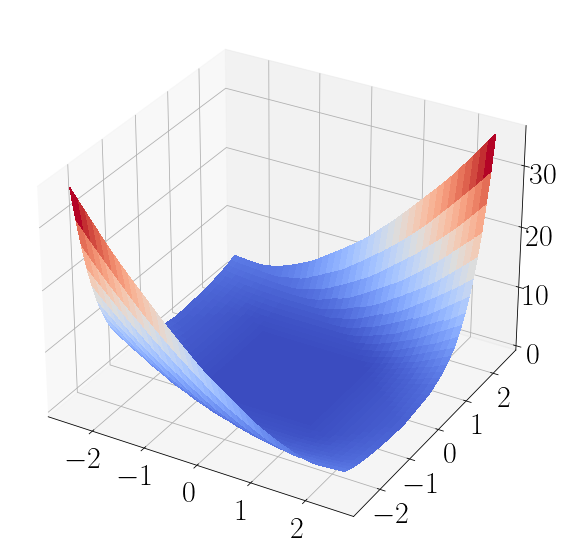

In [26]:
#%matplotlib widget
from matplotlib import cm

# Clipping large values for better visualization
#z_lim = 100
#hpb_mod = np.clip(hpb,a_min = None, a_max= z_lim)
hpb_mod = hpb.copy()

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x1, x2, hpb_mod, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(0, z_lim)
plt.show()

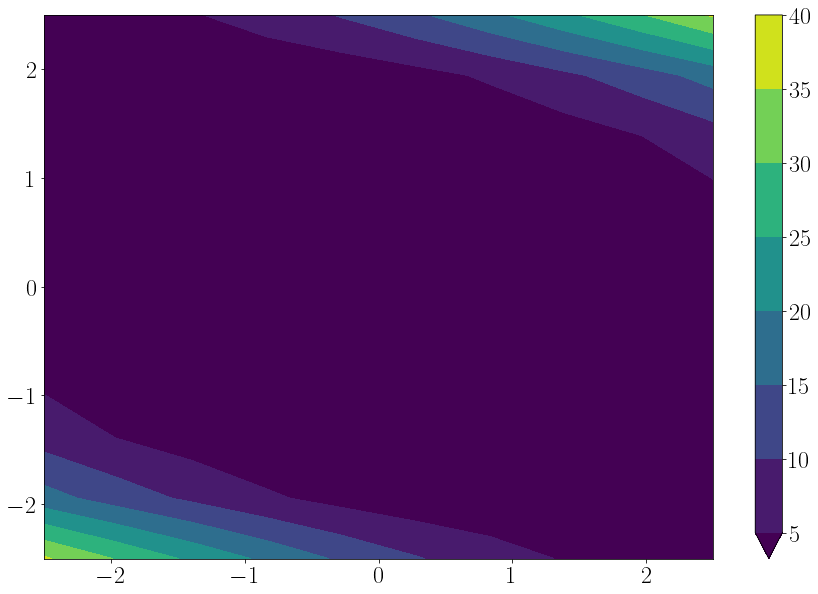

In [14]:
fig, ax = plt.subplots()
CS = ax.contourf(x1,x2, hpb, extend='min')
#ax.clabel(CS, inline=True, fontsize=10)
#ax.set_title('h_pb')
fig.colorbar(CS, ax=ax)
plt.show()

## Data generation for training

Since the state space is only 2-D we use uniform sampling. For larger state spaces another sampling scheme e.g., using Chen et al 2022 approach can be used

In [15]:
N_train = int(5*1e5) 
N_val = int(5e3)
n = sys.state_dim
torch.manual_seed(0)


scaling = 5  # -> [-2.5, 2.5] 
mean = 0.5

x_train = torch.rand(N_train, n)
x_val = torch.rand(N_val, n)

# TODO better method
x_train =  (x_train-0.5)*scaling
x_val =  (x_val-0.5)*scaling

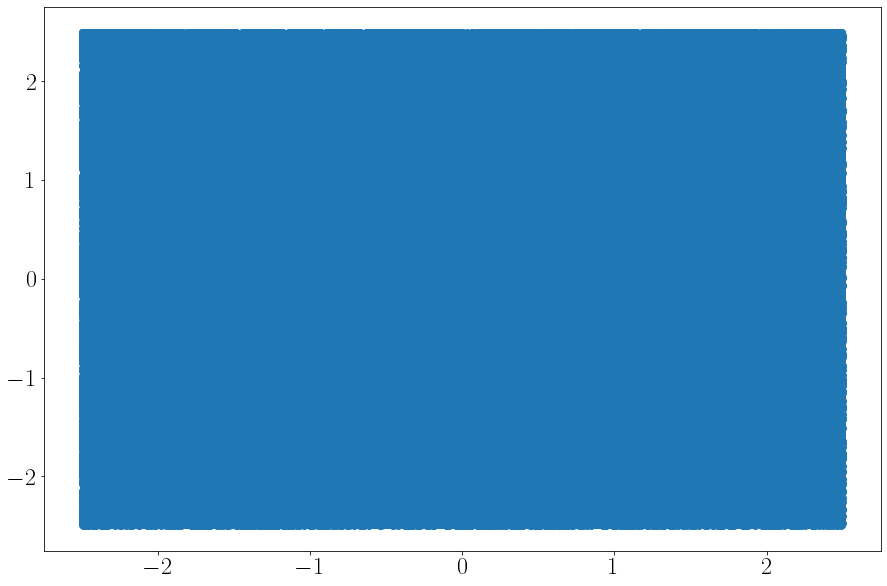

In [16]:
plt.scatter(x_train[:,0], x_train[:,1])

### Generate training labels

### Load datasets

In [14]:
train_data_set = torch.load('../data/data_set_500k_linear_paper.pt')
val_data = torch.load('../data/val_data_5k_linear_paper.pt')
#TODO change learning pipeline to use validation data set directly
x_val = val_data.X
y_val = val_data.y

In [15]:
len(train_data_set)

500000

### Specify NN Model type and architecture

In [26]:
LOAD_CHECKPOINT = False
LOAD_PATH = 'models/ext_model_lup_Aplus_06_04_18_46.pt'
LOG_NAME = LOAD_PATH[17:-5]
if not LOAD_CHECKPOINT :
    LOG_NAME = 'UNSPECIFIED'
print(LOG_NAME)

lup_Aplus_06_04_18_


In [27]:
from scripts.approximator import *
model = HpbApproximatorAplus()
#model = torch.load(PATH)

### Training 

In [28]:
from torch.utils.data.sampler import RandomSampler
# TODO improve speed only sample indices using subset random sampler

In [29]:
#learning_rate = 1e-5
batch_size = 128
epochs = 80 # TODO reduce and increase dataset

In [30]:
epoch_list = []
train_data_set_loader = DataLoader(train_data_set, batch_size=batch_size, sampler=RandomSampler(train_data_set))
loss_fn = nn.MSELoss()
#optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [31]:
optimizer = torch.optim.Adam(model.parameters())

In [32]:
if LOAD_CHECKPOINT :
    #model = torch.load(PATH)
    checkpoint = torch.load(LOAD_PATH)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch_list += checkpoint['epoch']
    loss_values_combined = checkpoint['loss']
    val_loss_values_combined = checkpoint['valloss']
    print('Loaded checkpoint')
else : # Start fresh
    loss_values_combined = []
    val_loss_values_combined = []
    print('Fresh start')

Loaded checkpoint


#### Start Training the neural network

In [25]:
loss_values = []
val_loss_values = []
epoch_list.append(epochs)
# Some code snippets used from pytorch tutorial : 
# https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

val_loss = 0 
#if len(val_loss_values_combined) > 0 :
#    val_loss = val_loss_values_combined[-1]

for t in tqdm(range(epochs)):
    #print(f"Epoch {t+1}\n-------------------------------")
    
    running_loss = 0
    # Training loop
    size = len(train_data_set_loader.dataset)
    for batch, (X, y) in enumerate(train_data_set_loader):
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() 

        if batch % 50 == 0 and False:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        
        
    loss_values.append(running_loss/len(train_data_set_loader))
    
    if t%10 == 0 :
        print(f"training loss: {loss_values[t]:>7f} epoch: [{t:>5d}/{epochs}]")        
        
    # Test set validaton 
    with torch.no_grad() :
        validation_pred = model(x_val.reshape(-1,2).float())
        val_loss = loss_fn(validation_pred, y_val)
        if t%10 == 0 :
            print(f'validation loss: {val_loss:>7f}')
    
    val_loss_values.append(val_loss)
    
    # Save checkpoint
    if True and t % 10 == 0 :
        print('Storing checkpoint of model')
        
        from datetime import datetime
        folder_name = '../models/checkpts/'
        name = 'model_lup_' + 'A_' + datetime.now().strftime("%d_%m_%H_%M_%S")

        path_model_only =  folder_name + f'{name}.pt'
        name_ext = 'ext_' + name
        path_extended =  folder_name + f'{name_ext}.pt'

        torch.save(model, path_model_only) #Just model

        torch.save({
                    'epoch': t,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss_values_combined,
                    'valloss' : val_loss_values_combined,
                    }, path_extended)

loss_values_combined += loss_values
val_loss_values_combined += val_loss_values

  0%|          | 0/80 [00:00<?, ?it/s]

training loss: 2.137548 epoch: [    0/80]
validation loss: 1.149994
Storing checkpoint of model
training loss: 0.015475 epoch: [   10/80]
validation loss: 0.014760
Storing checkpoint of model
training loss: 0.007446 epoch: [   20/80]
validation loss: 0.006229
Storing checkpoint of model
training loss: 0.005300 epoch: [   30/80]
validation loss: 0.010851
Storing checkpoint of model
training loss: 0.003848 epoch: [   40/80]
validation loss: 0.003576
Storing checkpoint of model
training loss: 0.003169 epoch: [   50/80]
validation loss: 0.003260
Storing checkpoint of model
training loss: 0.002798 epoch: [   60/80]
validation loss: 0.001881
Storing checkpoint of model
training loss: 0.002747 epoch: [   70/80]
validation loss: 0.003741
Storing checkpoint of model


In [127]:
loss_values_combined[-1]

0.0005793810860252128

In [128]:
val_loss_values_combined[-1]

tensor(0.0002)

In [129]:
# Computing moving average validation loss (less noise)
vloss = torch.FloatTensor(val_loss_values_combined)
moving_avg = []
window = 25
for k in range(len(vloss)-1):
    moving_avg.append((torch.mean(vloss[(k-window):(k)])))

Plot loss during training

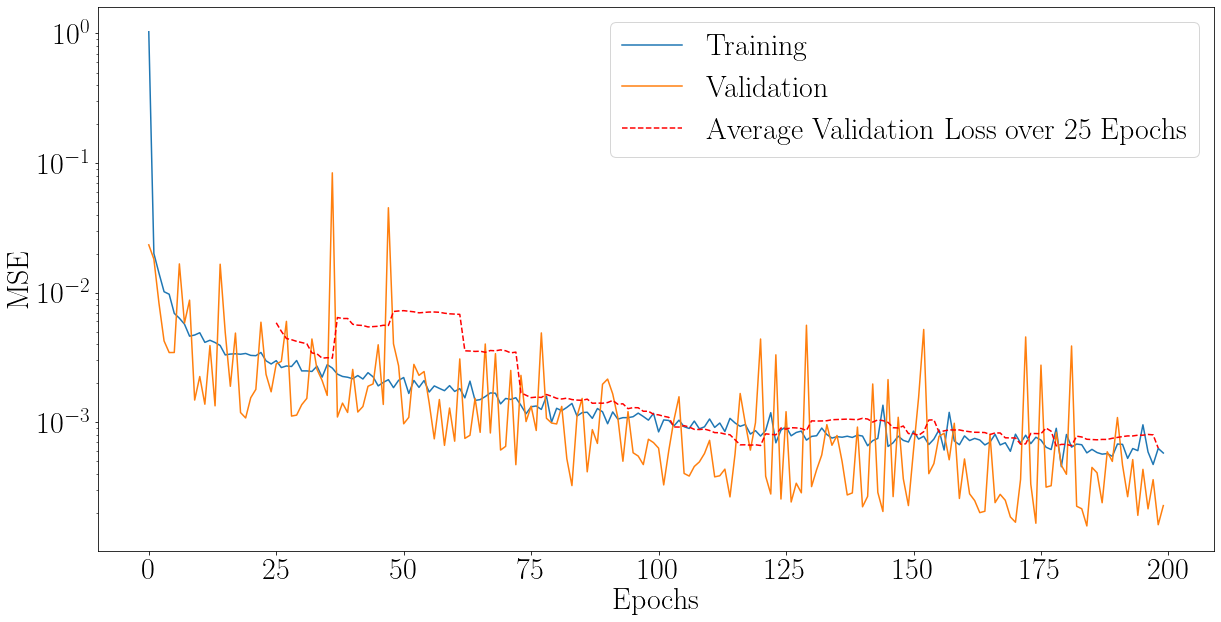

In [130]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(loss_values_combined, label='Training')
plt.plot(val_loss_values_combined, label='Validation' )
plt.plot(moving_avg, '--',label=f'Average Validation Loss over {window} Epochs',color='red')
plt.yscale('log')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MSE')
#plt.grid()
#if save_figure :
#plt.savefig(f'plots/pdf/linear_learning_{LOG_NAME}_loss_curve_{epochs}_500k_pts.pdf')

In [131]:
test_point = torch.tensor([1, 0])
test_point = test_point.reshape(-1,2).float()
with torch.no_grad() :
    a = model(test_point)
print(a)

tensor([[0.0076]])


## Visualization

#### Plot learned $h_{pb}$ vs optimal

In [33]:
from tqdm.notebook import tqdm
#%matplotlib widget
n_points = 50
x1 = np.linspace(-2.5,2.5,n_points)
x2 = np.linspace(-2.5,2.5,n_points)
x1,x2 = np.meshgrid(x1,x2)
hpb_learned = torch.zeros((len(x1), len(x2)))
hpb_optim = np.zeros((len(x1), len(x2)))
#x_safe, u_safe = sim.simulate_discrete(x0, lin_sys, controller_object=algo, Nsteps=N_steps)

for j in tqdm(range(len(x1))):
    for k in tqdm(range(len(x2)), leave = False):
        with torch.no_grad() :
            hpb_learned[j,k] = model(torch.tensor([x1[j,k], x2[j,k]]).reshape(-1,2).float())
        try :
            _ , _, hpb_optim[j,k] = pcbf.solve(np.array([x1[j,k], x2[j,k]]))
        except Exception as e:
            #print(e)
            hpb_optim[j,k] = np.max(hpb_optim)
            #print(x1[j,k], x2[j,k])
            pass

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

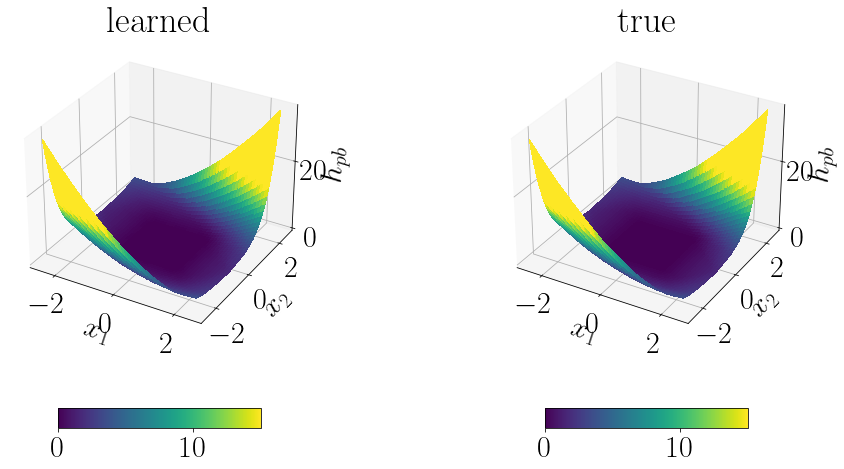

In [34]:
from matplotlib import cm
plt.rcParams['figure.figsize'] = [15, 10]

# Clipping large values for better visualization
#z_lim = 15
#hpb_learned_mod = np.clip(hpb_learned, a_min = None, a_max= z_lim)
#hpb_optim_mod = np.clip(hpb_optim, a_min = None, a_max= z_lim) 

hpb_learned_mod = hpb_learned
hpb_optim_mod = hpb_optim

fig = plt.figure(figsize=plt.figaspect(0.5))

# PLOT LEARNED
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(x1, x2, hpb_learned_mod, cmap=cm.viridis, vmax=15,
                       linewidth=0, antialiased=False)
#ax.set_zlim(0, z_lim)
ax.title.set_text('learned')
fig.colorbar(surf, shrink=0.5, aspect=10, location='bottom')

ax.set_xlabel('$x_1$')#, fontsize=15)
ax.set_ylabel('$x_2$')#, fontsize=15)
ax.set_zlabel('$h_{pb}$')#, fontsize=15)
# PLOT OPTIMAL
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.title.set_text('true')
surf = ax.plot_surface(x1, x2, hpb_optim_mod, cmap=cm.viridis, vmax=15,
                       linewidth=0, antialiased=False)

#ax.set_zlim(0, z_lim)
fig.colorbar(surf, shrink=0.5, aspect=10, location='bottom')

ax.set_xlabel('$x_1$')#, fontsize=15)
ax.set_ylabel('$x_2$')#, fontsize=15)
ax.set_zlabel('$h_{pb}$')#, fontsize=15)

#if save_figure :
#plt.savefig(f'plots/pdf/linear_learned_{LOG_NAME}_vs_optimal_{n_points}pts_latex_vmax15.pdf')
plt.show()

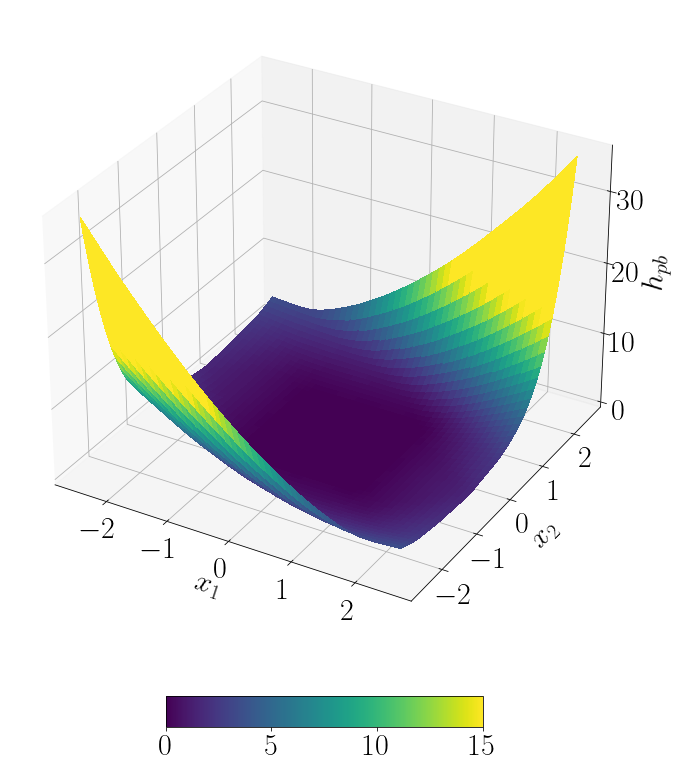

In [35]:
from matplotlib import cm
plt.rcParams['figure.figsize'] = [25, 25]
# Clipping large values for better visualization
#z_lim = 15


#hpb_learned_mod = np.clip(hpb_learned, a_min = None, a_max= z_lim)
#hpb_optim_mod = np.clip(hpb_optim, a_min = None, a_max= z_lim) 

hpb_learned_mod = hpb_learned
hpb_optim_mod = hpb_optim

#fig = plt.figure(figsize=plt.figaspect(0.5))
fig = plt.figure()

# PLOT LEARNED
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(x1, x2, hpb_learned_mod, cmap=cm.viridis, vmax=15,
                       linewidth=0, antialiased=False)
#ax.set_zlim(0, z_lim)
#ax.title.set_text('learned')
fig.colorbar(surf, shrink=.5, aspect=10, location='bottom', pad = 0.04)

ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 10

ax.set_xlabel('$x_1$')#, fontsize=15)
ax.set_ylabel('$x_2$')#, fontsize=15)
ax.set_zlabel('$h_{pb}$')#, fontsize=15)

#plt.savefig(f'plots/pdf/linear_3d_plot_learned_only_{LOG_NAME}.pdf', bbox_inches='tight')

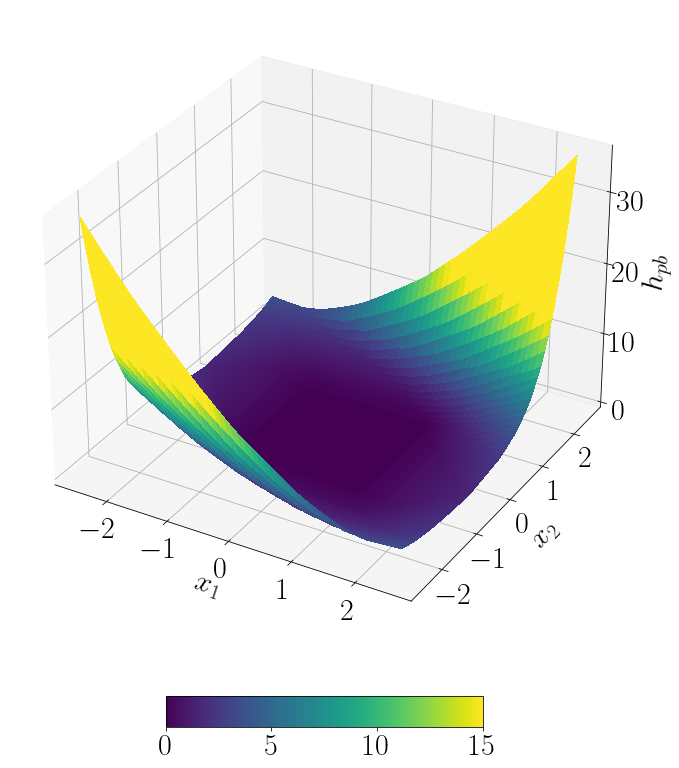

In [36]:
plt.rcParams['figure.figsize'] = [25, 25]
# PLOT OPTIMAL

fig = plt.figure()

ax = fig.add_subplot(1, 2, 1, projection='3d')
#ax.title.set_text('true')
surf = ax.plot_surface(x1, x2, hpb_optim_mod, cmap=cm.viridis, vmax=15,
                       linewidth=0, antialiased=False)

#ax.set_zlim(0, z_lim)
fig.colorbar(surf, shrink=.5, aspect=10, location='bottom', pad = 0.04, ticks=[0,5,10,15])

ax.set_xlabel('$x_1$')#, fontsize=15)
ax.set_ylabel('$x_2$')#, fontsize=15)
ax.set_zlabel('$h_{pb}$')#, fontsize=15)

ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 10

#if save_figure :
#plt.savefig(f'plots/pdf/linear_3d_optimal_{LOG_NAME}.pdf', bbox_inches='tight')
plt.show()

### Extract error of model and plot it

In [37]:
print(hpb_learned.median())

tensor(1.3044)


In [38]:
print(hpb_learned.min())

tensor(0.)


In [39]:
h_abs_err = np.abs(hpb_learned - hpb_optim)
sqr_err = np.square(hpb_learned - hpb_optim)
rms_err = np.sqrt(sqr_err.mean())
norm_rms_err = rms_err / (hpb_optim.max()-hpb_optim.min())
print('max_error',h_abs_err.max().numpy())
print('min_error',h_abs_err.min().numpy())
print('average_error', h_abs_err.mean().numpy())
print('median_error', h_abs_err.median().numpy())
print('variance error', h_abs_err.var().numpy())
print('RMS error', rms_err.numpy())
print('Normalized RMS error', norm_rms_err.numpy())
print(f'{h_abs_err.max().numpy():.4f}, {h_abs_err.mean().numpy():.4f}/{h_abs_err.median().numpy():.4f}, {h_abs_err.var().numpy():.4f}/{h_abs_err.std().numpy():.4f}, {rms_err.numpy():.4f}/{norm_rms_err.numpy():.4f} ')

max_error 0.32852876099606476
min_error 1.9083543262058093e-13
average_error 0.02930040437236503
median_error 0.013610612701258962
variance error 0.0016486822484096516
RMS error 0.050065322049242786
Normalized RMS error 0.0014021008132864138
0.3285, 0.0293/0.0136, 0.0016/0.0406, 0.0501/0.0014 


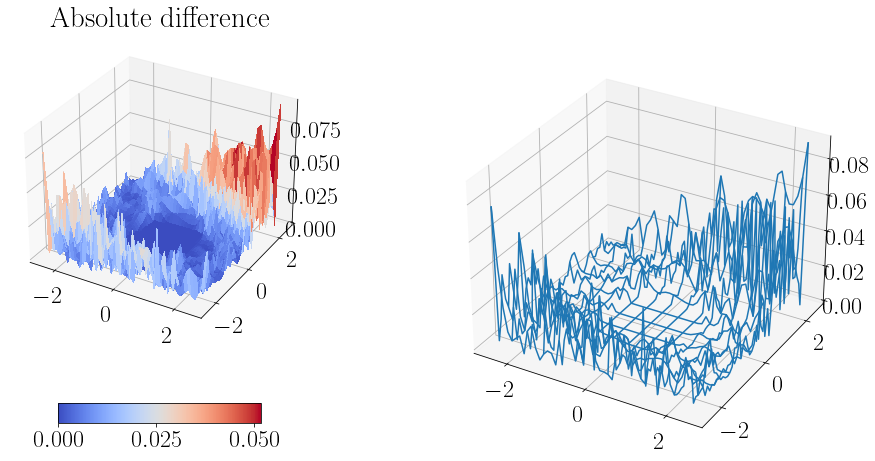

In [101]:
from matplotlib import cm

# Clipping large values for better visualization
z_lim = 2


h_abs_err_mod = np.clip(h_abs_err, a_min = None, a_max= z_lim)

fig = plt.figure(figsize=plt.figaspect(0.5))

# PLOT 1
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(x1, x2, h_abs_err_mod, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(0, z_lim)
ax.title.set_text('Absolute difference')
fig.colorbar(surf, shrink=0.5, aspect=10, location='bottom')


# PLOT 2
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.title.set_text('')
surf = ax.plot_wireframe(x1, x2, h_abs_err_mod, rstride=5, cstride=4)

#ax.set_zlim(0, z_lim)
plt.show()

Plot regions where abs error small 

Text(0, 0.5, '$x_2$')

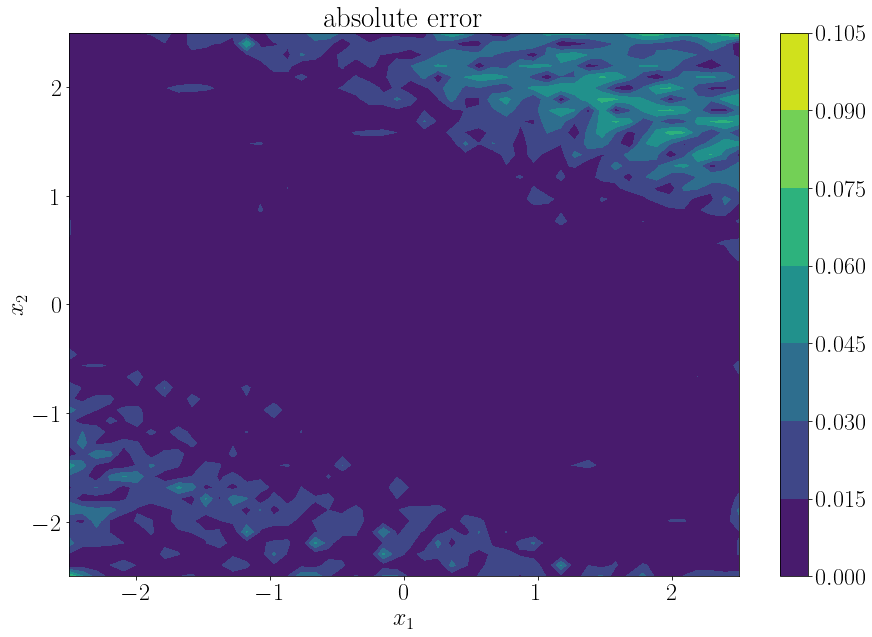

In [102]:
fig, ax = plt.subplots()
CS = ax.contourf(x1,x2, h_abs_err)
#ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('absolute error')
fig.colorbar(CS, ax=ax)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
#plt.savefig(f'plots/absolute_error_learned_{LOG_NAME}_vs_true_{n_points}pts_latex.png')

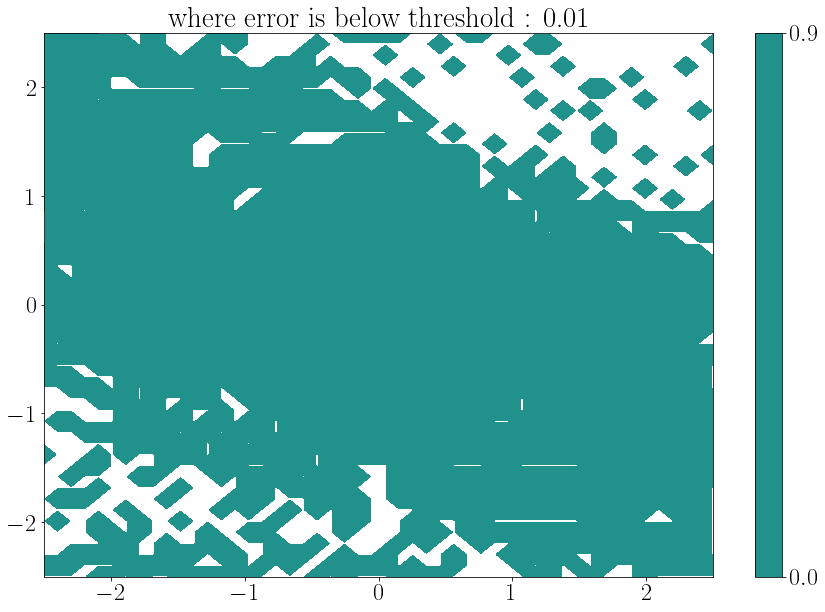

In [103]:
err_thres = 1e-2
hbp_indicator_err = np.zeros_like(h_abs_err_mod )
idx = np.where(h_abs_err_mod > err_thres)
hbp_indicator_err[idx] = 1

fig, ax = plt.subplots()
CS = ax.contourf(x1,x2, hbp_indicator_err, levels=[0,.9])
ax.set_title(f'where error is below threshold : {err_thres}')
fig.colorbar(CS, ax=ax)
plt.show()

#### Plot along one dimension (i.e. slice) to compare shape

In [91]:
plt.rcParams['figure.figsize'] = [15, 10]
x1_1d =  0.0
x2_1d = np.linspace(-2.5,2.5,100)
y_optimal = np.zeros((len(x2_1d,)))
y_learned = np.zeros((len(x2_1d),))


for i in range(len(x2_1d)):
    _,_, y_optimal[i] = pcbf.solve(np.array([x1_1d, x2_1d[i]]))
    y_learned[i] = model(torch.tensor([x1_1d, x2_1d[i]]).reshape(-1,2).float())
    

    
error = np.abs(y_optimal - y_learned)
    
    

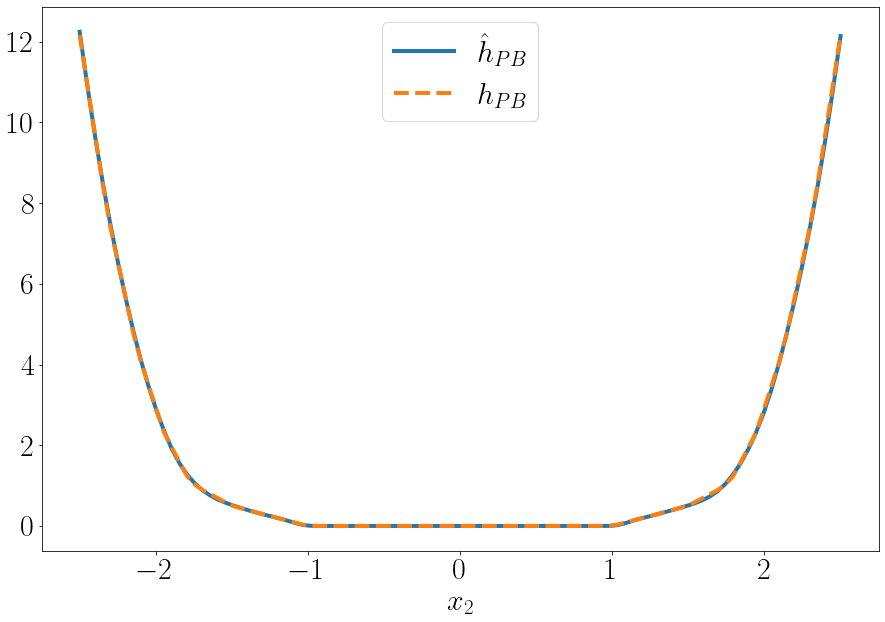

In [92]:
plt.plot(x2_1d, y_learned, label='$\hat{h}_{PB}$', linewidth = 4)
plt.plot(x2_1d, y_optimal, '--', label='$h_{PB}$', linewidth = 4)
plt.legend()
plt.xlabel('$x_2$')

#if save_fig :
#plt.savefig(f'plots/example_slice_x1=0_learned_{LOG_NAME}_vs_optimal_legend_simple.svg')

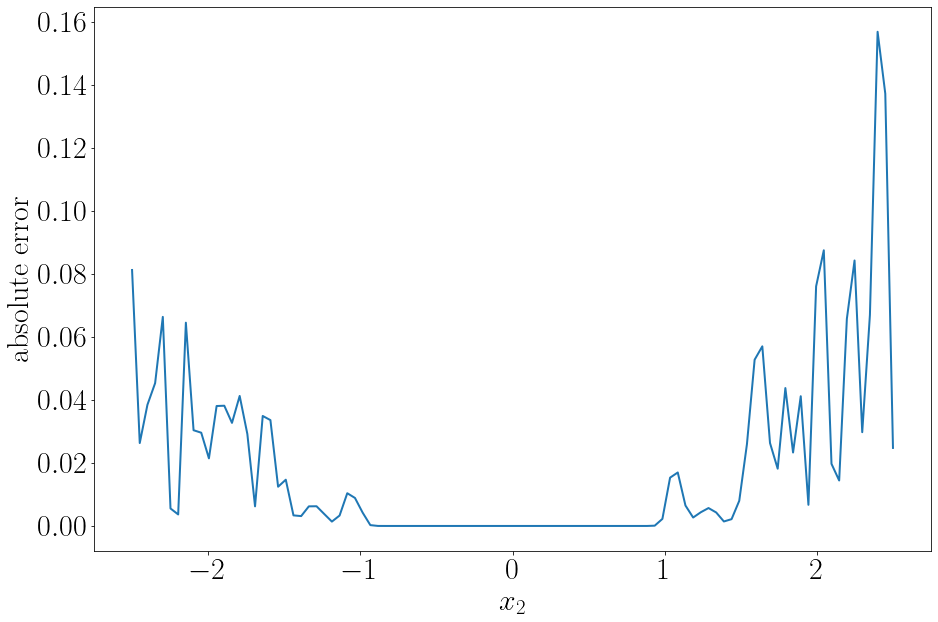

In [93]:
plt.plot(x2_1d, error, label='learned', linewidth = 2)
plt.xlabel('$x_2$')
plt.ylabel('absolute error')
#plt.savefig(f'plots/example_slice_x1=0_learned_{LOG_NAME}_abserror.svg')

Combine slice plot with error plot

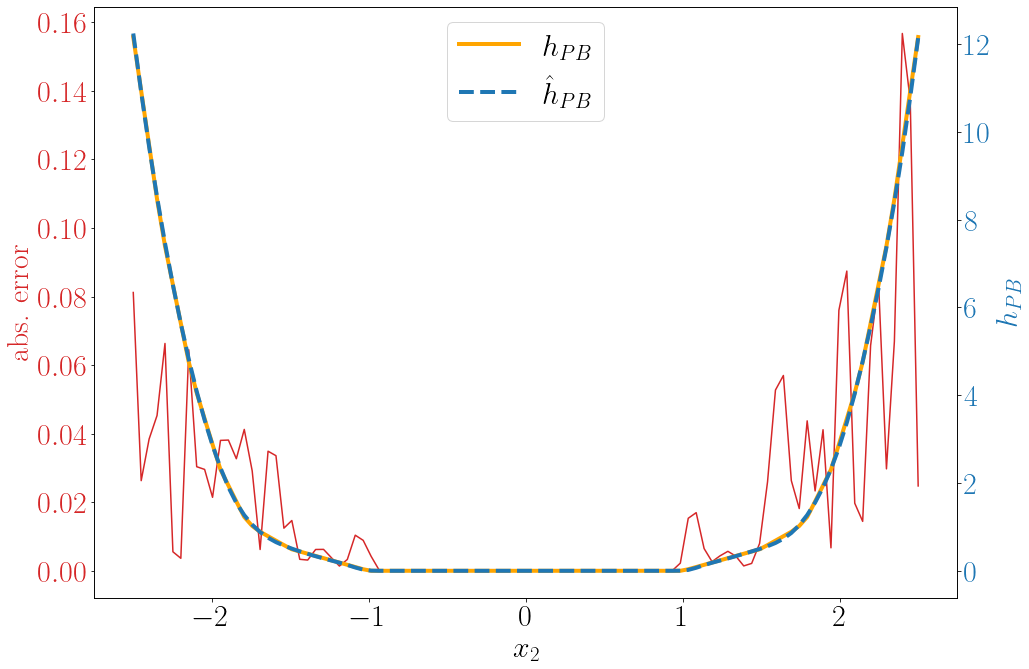

In [101]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('$x_2$')
ax1.set_ylabel('abs. error', color=color)
ax1.plot(x2_1d, error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$h_{PB}$', color=color)  # we already handled the x-label with ax1
ax2.plot(x2_1d, y_optimal, linewidth =4, label='$h_{PB}$', color='orange')
ax2.plot(x2_1d, y_learned, '--', linewidth =4,label='$\hat{h}_{PB}$')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc=9)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#if save_fig :
#plt.savefig(f'plots/pdf/linear_example_slice_x1at0_learned_somepadding_{LOG_NAME}_vs_optimal_combined_with_error.pdf')#, bbox_inches='tight')
plt.show()

#### Plotting of contour of function

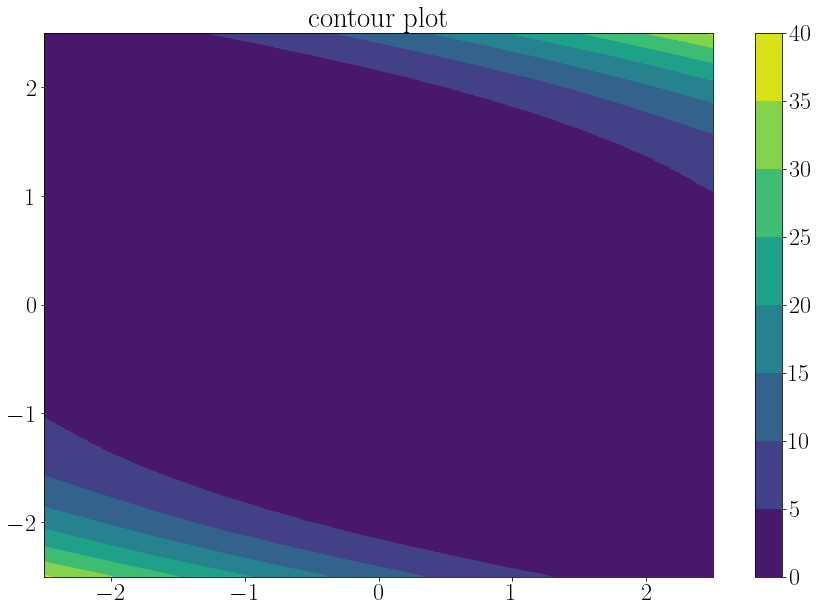

In [108]:
fig, ax = plt.subplots()
CS = ax.contourf(x1,x2, hpb_learned)
ax.set_title(f'contour plot')
fig.colorbar(CS, ax=ax)

#### Plot area where learned model is zero

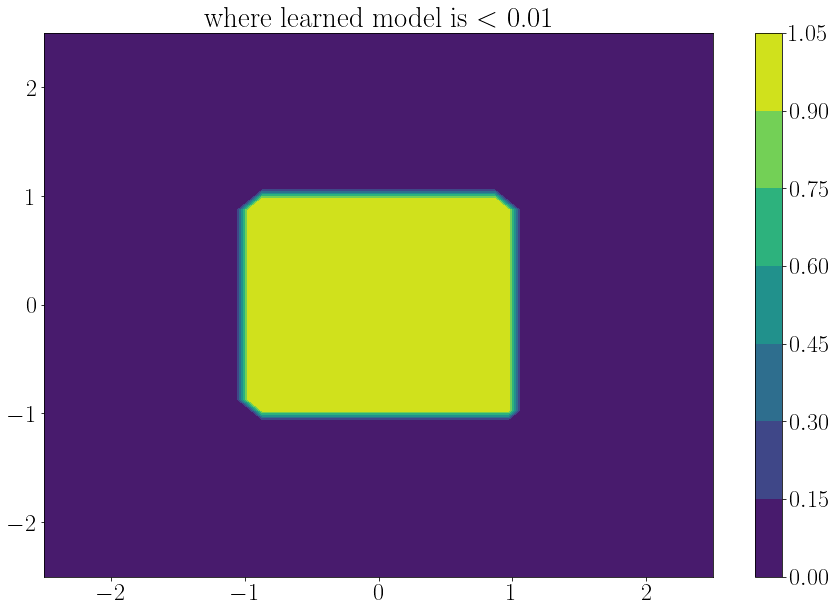

In [111]:
hbp_zero = np.zeros_like(hpb_learned )
zero_threshold = 1e-2
idx = np.where(hpb_learned < zero_threshold)
hbp_zero[idx] = 1

fig, ax = plt.subplots()
CS = ax.contourf(x1,x2, hbp_zero)
ax.set_title(f'where learned model is $<$ {zero_threshold}')
fig.colorbar(CS, ax=ax)

### Save model + some training data

In [105]:
from datetime import datetime
folder_name = 'models/'
name = 'model_lup_' + 'A_' + datetime.now().strftime("%d_%m_%H_%M")

path_model_only =  folder_name + f'{name}.pt'
name_ext = 'ext_' + name
path_extended =  folder_name + f'{name_ext}.pt'

torch.save(model, path_model_only) #Just model

torch.save({
            'epoch': epoch_list,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss_values_combined,
            'valloss' : val_loss_values_combined,
            }, path_extended)


In [106]:
print(path_extended)
LOAD_PATH = path_extended
LOG_NAME = LOAD_PATH[17:-5]

models/ext_model_lup_A_26_05_19_42.pt
